In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cardio_train.csv", sep=";")

df["cardio"].value_counts()
df["cholesterol"].value_counts().values

array([52385,  9549,  8066])

In [200]:
sns.set_theme()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9460\3936769269.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3, 0].set_xticklabels(["negative", "positive"])


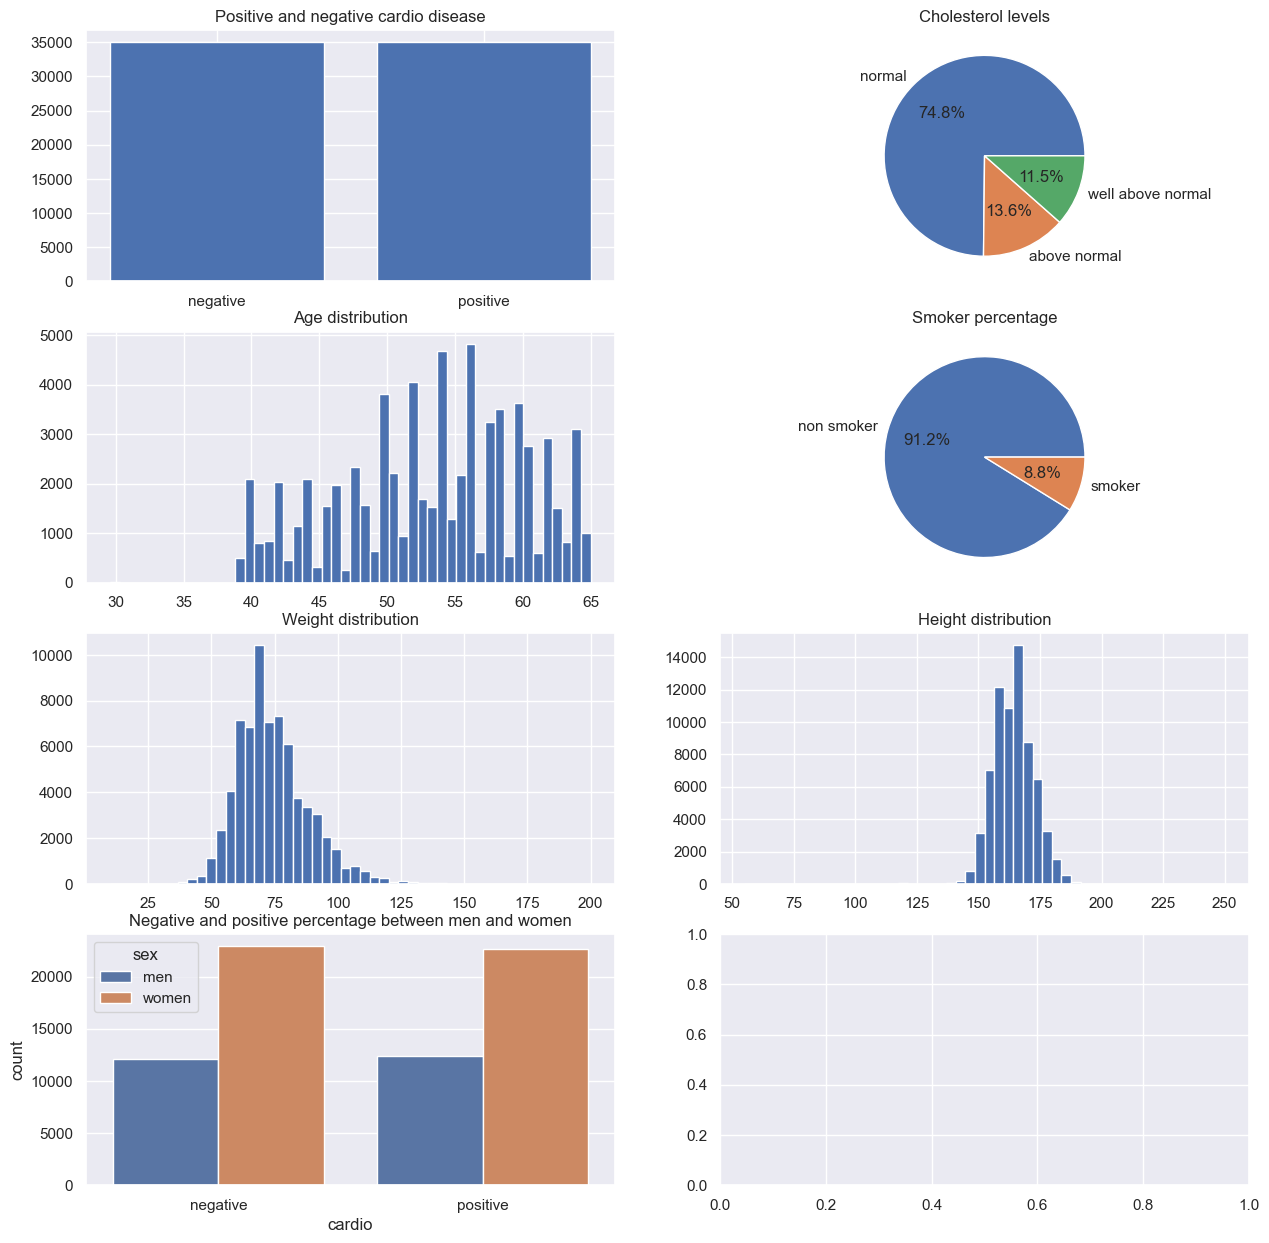

In [201]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15)) # skapar fönster med grafer

age = round(df["age"] / 365, 1) # konverterar dagar för ''ages'' till år
cardio = df["cardio"].value_counts().values # räknar antal värden för hjärt- och kärlsjukdomar 
df["sex"] = df["gender"].map(lambda x : "women" if x == 1 else "men") # adderar en ny kolumn med namn ''sex'' och omvandlar 1:or och 2:or till ''women'' och ''men''

cardio_labels=["negative", "positive"]
ax[0, 0].bar(cardio_labels, cardio) # visar patienter som är negativa och positiva för hjärt- och kärlsjukdomar
ax[0, 0].set_title("Positive and negative cardio disease")
ax[0, 1].pie(df["cholesterol"].value_counts().values, labels=["normal", "above normal", "well above normal"], autopct= "%1.1f%%")
ax[0, 1].set_title("Cholesterol levels")
ax[1, 0].hist(age, bins=50)
ax[1, 0].set_title("Age distribution")
ax[1, 1].pie(df["smoke"].value_counts().values, labels=["non smoker", "smoker"], autopct= "%1.1f%%")
ax[1, 1].set_title("Smoker percentage")
ax[2, 0].hist(df["weight"], bins=50)
ax[2, 0].set_title("Weight distribution")
ax[2, 1].hist(df["height"], bins=50)
ax[2, 1].set_title("Height distribution")
sns.countplot(data = df, x = "cardio", hue = "sex", ax = ax[3, 0])
ax[3, 0].set_xticklabels(["negative", "positive"])
ax[3, 0].set_title("Negative and positive percentage between men and women")

plt.show()

In [202]:
df["bmi"] = df["weight"] / (df["height"]/100)**2
df["bmi"] = df["bmi"].round(1)

In [203]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,men,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,women,34.9
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,women,23.5
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,men,28.7
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,women,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,men,26.9
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,women,50.5
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,men,31.4
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,women,27.1


In [204]:
# Det högsta uppmätta BMI värdet är 251,1, medans det lägsta upmätta BMI värdet är 6,7.

df = df[(df["bmi"] >= 7) & (df["bmi"] <= 260)]

In [205]:
df["bmi"].min(), df["bmi"].max()

(np.float64(7.0), np.float64(237.8))

In [206]:
bins = [0, 18.4, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ["Underweight", "Normal weight", "Overweight",
          "Obese Class 1", "Obese Class 2", "Obese Class 3"]
df = df.copy()
df["bmi_categories"] = pd.cut(df["bmi"], bins=bins, labels=labels)

In [207]:
df[df["bmi"] == 18.4]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi,bmi_categories
1067,1484,18133,1,160,47.0,110,70,1,1,0,0,1,0,women,18.4,Underweight
2267,3193,15190,2,179,59.0,110,70,1,1,0,0,1,0,men,18.4,Underweight
3229,4553,15091,1,165,50.0,100,80,1,1,0,0,1,0,women,18.4,Underweight
4961,7022,22639,2,168,52.0,120,80,1,1,0,0,1,0,men,18.4,Underweight
5139,7301,18212,1,165,50.0,110,60,1,1,0,0,1,0,women,18.4,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63976,91336,15357,1,168,52.0,100,70,1,2,0,0,1,0,women,18.4,Underweight
65380,93326,16751,2,168,52.0,120,80,1,1,1,0,1,0,men,18.4,Underweight
65799,93914,21429,2,160,47.0,110,70,1,1,0,0,0,1,men,18.4,Underweight
66837,95428,19564,1,165,50.0,120,70,1,1,0,0,1,0,women,18.4,Underweight


In [213]:
df[df["bmi"]<= 20]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,sex,bmi,bmi_categories
11,16,18815,2,173,60.0,120,80,1,1,0,0,1,0,men,20.0,Normal weight
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0,men,18.5,Normal weight
80,109,16591,1,159,49.0,120,70,1,1,0,0,1,0,women,19.4,Normal weight
107,142,14499,2,164,48.0,110,70,1,2,1,1,1,1,men,17.8,Underweight
108,143,15440,2,174,54.0,130,80,2,2,0,0,1,1,men,17.8,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69879,99808,21906,1,156,48.0,120,80,1,1,0,0,1,0,women,19.7,Normal weight
69908,99856,14823,1,152,42.0,120,80,1,1,0,0,1,0,women,18.2,Underweight
69912,99861,16002,1,155,48.0,90,70,1,1,0,0,1,0,women,20.0,Normal weight
69919,99871,17312,1,159,45.0,110,70,2,2,0,0,1,0,women,17.8,Underweight
